# ICT nudging pipelines notebook

## Introduction

This notebook is part of a series of notebooks presenting the numerical simulations, and the results, for the article **"Realistic Nudging through ICT Pipelines to Help Improve Energy Self-Consumption for Management in Energy Communities".**

### General description

Our model comprises two parts:

1. a **simulated part** which simulates an household consuming energy, and reacting to nudges.

2. a **real world part** which contains the true algorithms processing the available information, and constructing the nudges.

The scheme below shows the various parts of our model. The real world algorithms are plugged on the simulated part, but they can be unplugged, and plugged into the "real world".

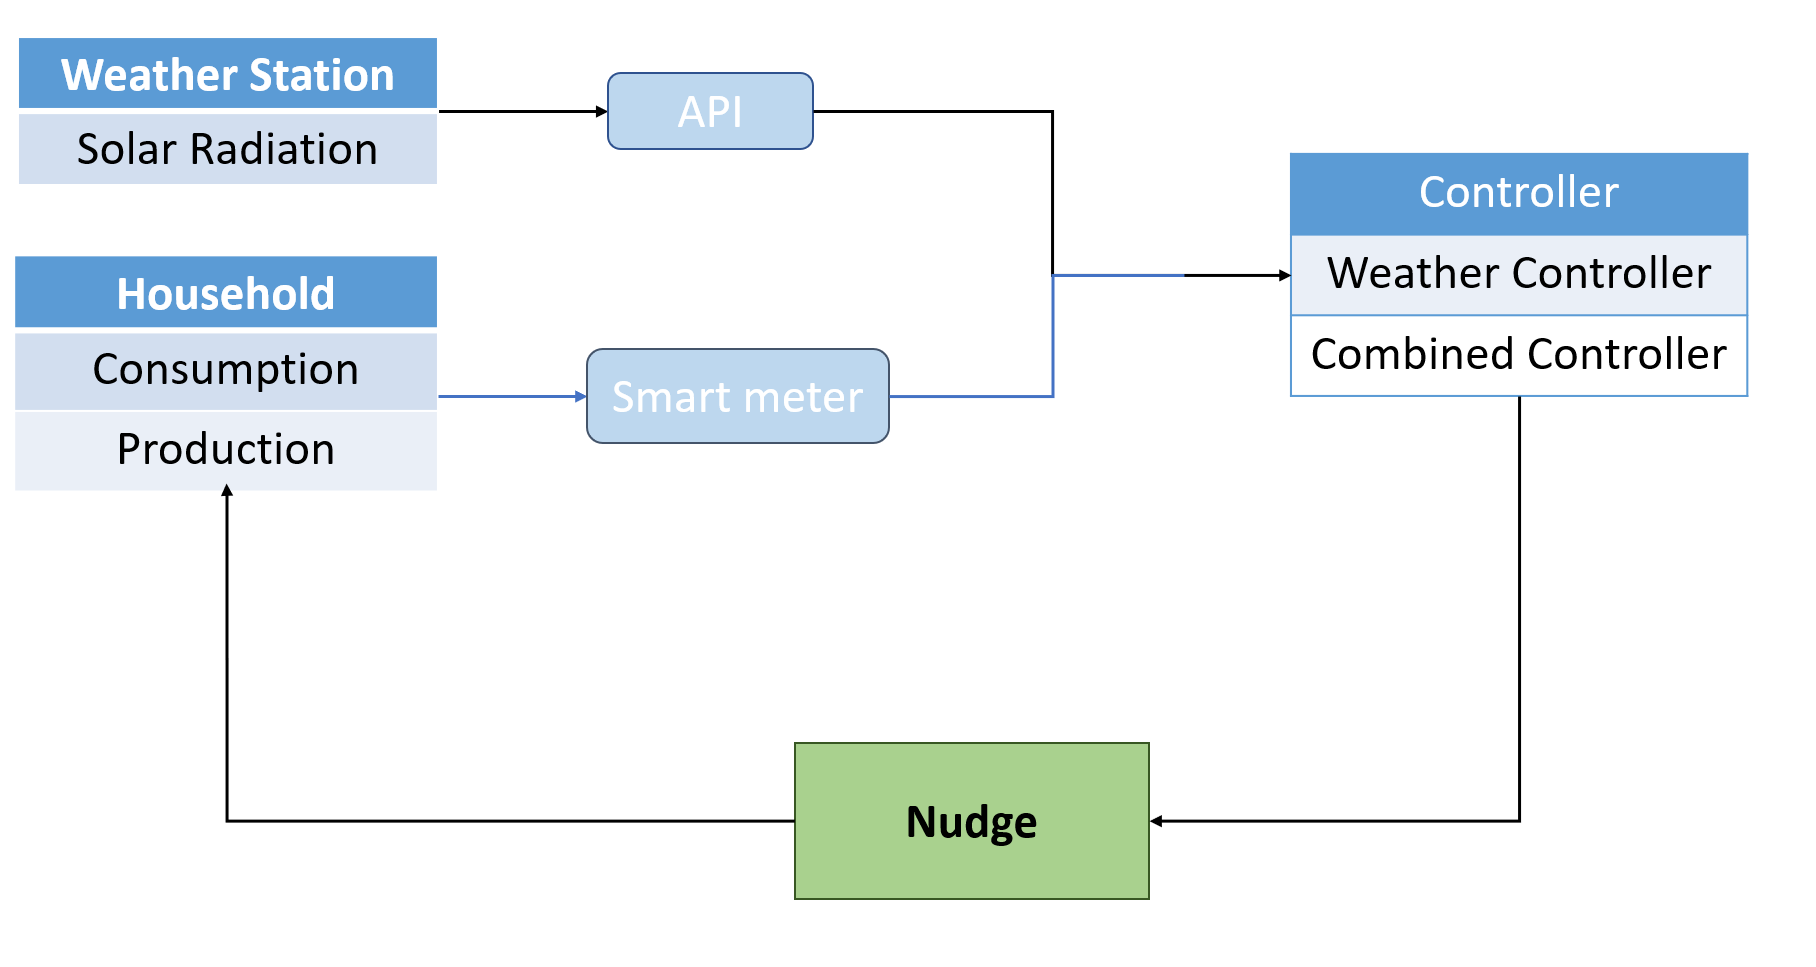

In [1]:
from IPython.display import Image
Image(filename='NudgingPipeline.PNG') 

### Case study 

The numerical simulations presented in **Section 4.2.** illustrate the efficiency of our nudging pipelines in improving the self-sufficiency, and self-consumption rates of the synthetic household.

Our case study is the following. We consider a household with
- a **shiftable consumption**, which may be shifted in time by the household people. It consists in the use of **a dishwasher every day in the morning**, and in the use of **a washing machine every three days in the evening**.


- a **fixed consumption**, which is not shiftable. It consists in the not shiftable part of the consumption of a real energy profile.

Therefore, the shiftable part of the consumption occurs in the morning or in the evening, as is often the case for working households, which people commute to work every day.


## Setting-up the model and the simulation parameters

We first obtain the absolute path of the current working directory, and import some utils modules.

In [2]:
import os
path = os.path.abspath(os.path.dirname(os.getcwd()))
path = os.path.abspath(os.path.join(os.getcwd(), ".."))
os.chdir(path)
from src.utils import set_simulation_config as sconf
import utils_notebook as ub

The simulation depends on various parameters, related to the different aspects of the model, in the simulated world, and the real world algorithms.

In the **simulated world**, we have:

1. the **household**;


2. the **solar pannels**;


3. the **general simulation settings.**

The **real world algorithms** are
1. the **controllers** (algorithms which process information and send nudges to the household).

**There are several parameters in the simulation configuration whose values we have fixed**,and for more information, please refer to the notebook "[simple example](https://gitlab.enogrid.ovh/recherche-et-d-veloppement/ml_for_nudging/-/blob/open_source/Notebook_Exemple/Simple_example.ipynb "Go to Example notebook").". 


We define below the main parameters, and briefly comment on them.


### Household settings
Here, all that is required is to specify the location of the data.
This data file contains the energy consumption profiles for each appliance that was measured. We utilized this data to determine the shiftable and non-shiftable profiles.

In [3]:
data_path = "./data/inputs/synthetic_data/synthetic_working_house_data.csv" # data location

###  Solar pannels
The variable **coeff_sunshine_to_prod** represents the capacity, in Watts, of the solar pannels (that is, their production when sunshine is at its maximum).

Please refer to the notebook for explanations about this choice ["Influence of the Amount of Production"](https://gitlab.enogrid.ovh/recherche-et-d-veloppement/ml_for_nudging/-/blob/py_notebooks/Notebook_Exemple/Influence%20of%20the%20Amount%20of%20Production%20.ipynb) and refer to the **Section 4.6.** in our paper.

In [4]:
coeff_shunshin_to_prod = [2000] # production level

During the simulation, we compute synthetic sunshine coefficients. They depend on the time of day, the month of year, and the level of clouds. The sequence of clouds is modelled as a Markov Chain. It is therefore stochastic.

### Controllers settings


We set parameters for our two controllers: Weather Controller, and Combined Controller.

1. **nb_periods_max** : This parameter sets the maximum number of **green periods** labelled by a nudge,The default value is 4. , please refer to the notebook for explanations about this choice ["Influence of the Number of Green Periods"](https://gitlab.enogrid.ovh/recherche-et-d-veloppement/ml_for_nudging/-/blob/open_source/Notebook_Exemple/Influence%20of%20the%20Number%20of%20Green%20Periods.ipynb) and refer to the **Section 4.7.** in our paper.


2. **predictor_type** : this parameter specifies the type of energy forecasting model to use for the Combined Controller. There are two options: a "simple" model (using as consumption prediction past consumption averages for each day, and each 30 minutes time slot), and a "Random Forest" model.

In [5]:
# Number of green periods by weekly nudge: these are 2 hour periods, in which we encourage the user to consume.
nb_periods_max = [4] # number of green period by nudge
predictor_type = "simple"  # Simple or random_forest, for "Combined Controller"


### General Simulation Settings

Here are some important general parameters for the simulation:

1. **Timeline Data** :The timeline data is used to define both the historical data for training energy forecasting models and the simulation data for nudging simulations. The default values of the timeline configuration are defined in the **'household_timeline.json' file**. If you wish to use alternative values, please consult the notebook "**[simple example](https://gitlab.enogrid.ovh/recherche-et-d-veloppement/ml_for_nudging/-/blob/open_source/Notebook_Exemple/Simple_example.ipynb "Go to Example notebook")**".Here is an example of how to **set the timeline data**. **In this notebook, we use the defaut values of timeline data.**


2. **nb_runs** : In order to account for the stochasticity of the synthetic solar production we use, we average our results over several runs.



3. **run_optimisation** : If **True**, compare the simulation results obtained from the nudge algorithm with the results obtained from the optimization algorithm calculated by OMEGalpes. **OMEGAlpes** is **a linear optimization tool** designed to easily generate multi-carrier energy system models. Its purpose is to assist in developing district energy projects by integrating design and operation in pre-studies phases. For more informations, please refer to [OMEGalpes](https://omegalpes.readthedocs.io/en/stable/about_OMEGAlpes.html)




In [6]:
nb_runs = 50
run_optimisation= True
sim_conf=sconf.SimulationConfig(data_path,
                                nb_periods_max,predictor_type,
                                coeff_shunshin_to_prod)
cfg = sim_conf.simlation_config

## Metrics studied


1. **Self_consumption rate**: it refers to the percentage of the electricity generated by a renewable energy system that is consumed on-site by the system owner, rather than being exported to the grid. 


2. **Self_sufficiency rate**: it refers to the proportion of electricity that is generated by an energy source and consumed on-site, relative to the total electricity consumption of the site.


**For more informations, please refer to Section 3.2. of our paper.**



## Running simulations

We now run our simulations, with the parameters we have defined.

In [ ]:
run_sim = sconf.RunSimulation(sim_conf, run_optimisation=run_optimisation,nb_runs=nb_runs, nb_periods_max=nb_periods_max, coeff_sunshine=coeff_shunshin_to_prod)
result = run_sim.run_simulation()

## Visualisation

In addition to our two controllers, we present the following two results:

- Reference : The **absence of nudging** serves as the **lower bound** in terms of reference.


- Omegalpes : It represents an **optimization approach** aimed at **maximizing the self-consumption/sufficiency rate**. It provides a performance **upper bound**. It uses unrealistic information (detailed dissagregated knowledge of the future consumption), and thus cannot be used as a nudging algorithm.

### Self_consumption rate
We first study the self-consumption rate.

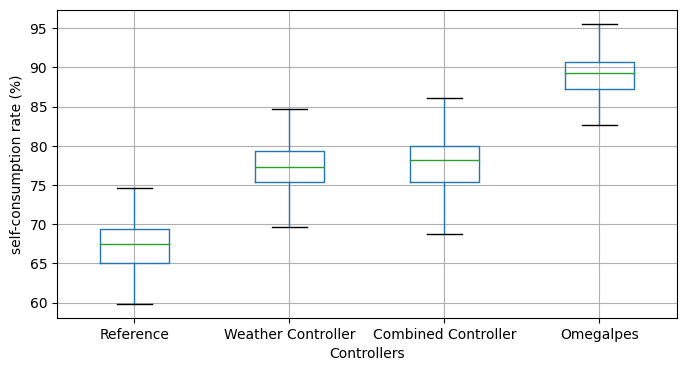

In [8]:
self_consumption_rate_result = ub.visualisation_results_of_all_simulations(result,'consumption')

 We see that both our controllers improve the self-consumption rate, with respect to the Reference case. Detailed values are provided below.

In [9]:
self_consumption_rate_result.mean()

Reference              67.400461
Weather Controller     77.353443
Combined Controller    77.630200
Omegalpes              89.121241
dtype: float64

We can visualise these average values as a bar plot.

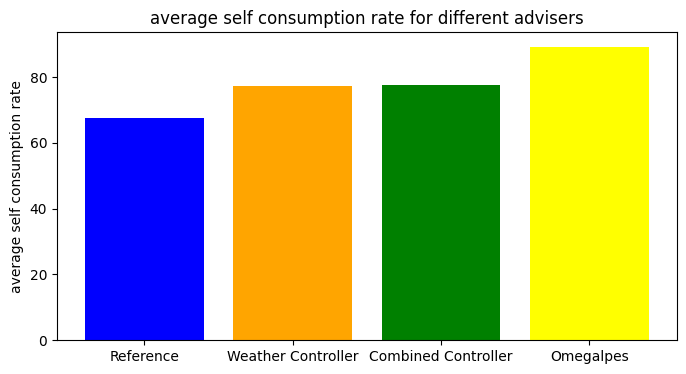

In [10]:
ub.average_result_visualisation(self_consumption_rate_result.mean(),'consumption')

### self-sufficiency rate
Now, we study the self-sufficiency rate

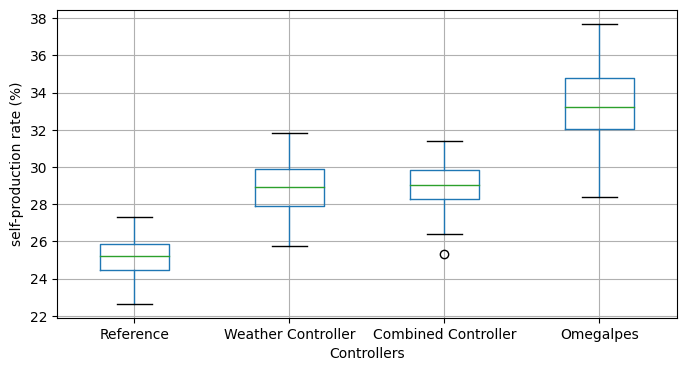

In [11]:
self_sufficiency_rate_result = ub.visualisation_results_of_all_simulations(result,'production')

We see that both our controllers improve the self-sufficiency rate, with respect to the Reference case. Detailed values are provided below.

In [12]:
self_sufficiency_rate_result.mean()

Reference              25.173803
Weather Controller     28.907535
Combined Controller    29.007637
Omegalpes              33.345103
dtype: float64

We can visualise these average values as a bar plot.

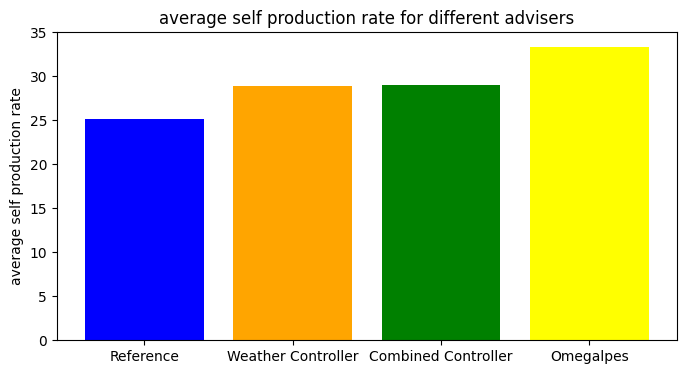

In [13]:
ub.average_result_visualisation(self_sufficiency_rate_result.mean(),'production')

## Improvement ratio : the improvement by different controller compare with the improvement of omegalpes


We compute the improvement ratio of different controllers compared to Omegalpes using the equations: 

$$ Ratio\_WeatherController =\frac{\text{self_consumption_rate}_{weather} - \text{self_consumption_rate}_{\text{reference}}}{\text{self_consumption_rate}_{Omegalpes} - \text{self_consumption_rate}_{reference}} $$

$$ Ratio\_CombinedController =\frac{\text{self_consumption_rate}_{combined} - \text{self_consumption_rate}_{reference}}{\text{self_consumption_rate}_{Omegalpes} - \text{self_consumption_rate}_{reference}} $$

The improvement ratios calculated using self-consumption rate and self-sufficiency rate are identical. Therefore, we will calculate the improvement ratio using only the self-consumption rate.

In [14]:
ratio = ub.calculate_improvement_ratio (self_consumption_rate_result)

## Average improvement ratio

In [15]:
ratio.mean()

Ratio_WeatherController    45.900083
Ratio_CominedController    47.251526
dtype: float64

## Conclusion

Based on the results obtained from the simulation on synthetic data in the general case, we can conclude that both Controllers enhance the **self-consumption rate** and **self-sufficiency rate** by approximately **8% (Combined Controller) and 5% (WeatherController)** respectively, compared to the reference. To showcase the performance of our controllers relative to OMEGalpes, we present the results as **a percentage of OMEGalpes**, which is approximately **50%**. It is evident that while our nudges cannot yield the full improvements achieved by OMEGalpes, they can still generate a substantial portion of it.